In [56]:
import pandas as pd
import numpy as np
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interactive
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd

from create_sample import create_sample

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
dataframe = pd.read_csv('C:\Code\Github\WISE\wise_flow\data\BPI_Challenge_2019.csv', sep=',')
df = create_sample(dataframe, 1000)

ValueError: Invalid file path or buffer object type: <class 'int'>

In [37]:


# Sample DataFrame creation
# Assuming 'dataframe' is your DataFrame and 'event_Cumulative_net_worth_(EUR)' is the column of interest

# For demonstration, let's create a mock dataframe
# dataframe = pd.DataFrame({'event_Cumulative_net_worth_(EUR)': np.random.randint(0, 1000000, 1000)})

sns.set(style="whitegrid")

def plot_filtered_data(lower_bound, upper_bound):
    # Filter the dataframe for the selected range
    filtered_df = dataframe[(dataframe['event_Cumulative_net_worth_(EUR)'] >= lower_bound) & (dataframe['event_Cumulative_net_worth_(EUR)'] <= upper_bound)]

    plt.figure(figsize=(10, 6))
    ax = sns.kdeplot(filtered_df['event_Cumulative_net_worth_(EUR)'], fill=True, bw_adjust=0.5)
    
    # Formatting for the x-axis ticks
    def format_eur(value, tick_position):
        if value >= 1e6:
            value_str = f'{value/1e6:.1f}M'
        elif value >= 1e3:
            value_str = f'{value/1e3:.1f}K'
        else:
            value_str = str(int(value))
        return value_str

    ax.xaxis.set_major_formatter(FuncFormatter(format_eur))
    
    plt.xlabel('Net Worth (EUR)')
    plt.ylabel('Density')
    plt.title('Distribution of Net Worth in Selected Range')
    plt.show()

# Widgets for selecting the data range
lower_bound_selector = widgets.IntSlider(min=0, max=500000, step=1000, value=0, description='Lower Bound (EUR):', continuous_update=False)
upper_bound_selector = widgets.IntSlider(min=0, max=500000, step=1000, value=500000, description='Upper Bound (EUR):', continuous_update=False)

interactive_plot = interactive(plot_filtered_data, lower_bound=lower_bound_selector, upper_bound=upper_bound_selector)
interactive_plot



interactive(children=(IntSlider(value=0, continuous_update=False, description='Lower Bound (EUR):', max=500000…

In [49]:
num_cases = len(event_log)
num_events = sum(len(case) for case in event_log)
print(f"Number of cases: {num_cases}")
print(f"Number of events: {num_events}")

Number of cases: 100
Number of events: 559


In [39]:
# Find the row with the earliest timestamp
first_event = dataframe[dataframe['event_time_timestamp'] == dataframe['event_time_timestamp'].min()]

# Find the row with the latest timestamp
last_event = dataframe[dataframe['event_time_timestamp'] == dataframe['event_time_timestamp'].max()]

print(first_event['event_time_timestamp'])
print(last_event['event_time_timestamp'])


#using pm4py filter out cases with events that are earlier than 2010-01-01 and later than 2019-12-31
filtered_log = pm4py.filter_time_range(event_log, "2010-01-01 00:00:00", "2019-12-31 23:59:59", mode='traces_contained')

num_cases = len(filtered_log)
num_events = sum(len(case) for case in filtered_log)
print(f"Number of cases in filtered_log: {num_cases}")
print(f"Number of events in filtered_log: {num_events}")

61   2018-01-02 17:49:00+00:00
Name: event_time_timestamp, dtype: datetime64[ns, UTC]
515   2019-10-01 15:45:00+00:00
Name: event_time_timestamp, dtype: datetime64[ns, UTC]
Number of cases in filtered_log: 100
Number of events in filtered_log: 559


In [40]:
dataframe.columns

Index(['eventID', 'case_Spend_area_text', 'case_Company', 'case_Document_Type',
       'case_Sub_spend_area_text', 'case_Purchasing_Document',
       'case_Purch._Doc._Category_name', 'case_Vendor', 'case_Item_Type',
       'case_Item_Category', 'case_Spend_classification_text', 'case_Source',
       'case_Name', 'case_GR-Based_Inv._Verif.', 'case_Item',
       'case_concept_name', 'case_Goods_Receipt', 'event_User',
       'event_org_resource', 'event_concept_name',
       'event_Cumulative_net_worth_(EUR)', 'event_time_timestamp', '@@index',
       '@@case_index', 'case:concept:name', 'concept:name', 'time:timestamp'],
      dtype='object')

In [41]:
dataframe.case_Item_Category.value_counts() 
dict = {'3-way match, invoice after GR':'DF1', '3-way match, invoice before GR':'DF2', '2-way match':'DF3', 'Consignment':'DF4'}
#create a new column with the description of the item category
dataframe['description'] = dataframe['case_Item_Category'].map(dict)

In [42]:
dataframe.groupby('description')['case_concept_name'].nunique()

description
DF1     7
DF2    87
DF4     6
Name: case_concept_name, dtype: int64

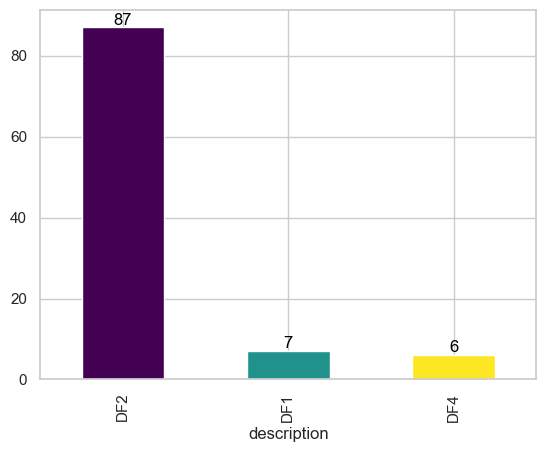

In [43]:
def visualize_column(df, column_name, caseId=False):
    if caseId:
        # Grouping by 'case_Item_Category' and counting unique 'case_concept_name' values
        unique_counts = df.groupby(column_name)['case_concept_name'].nunique()
    else:
        # Counting the occurrences of each value in the column
        unique_counts = df[column_name].value_counts()

    # Sorting the counts for better visualization (optional)
    unique_counts_sorted = unique_counts.sort_values(ascending=False)

    # Generating a list of colors for each bar, using the number of unique groups
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_counts_sorted)))

    # Plotting the bar chart
    ax = unique_counts_sorted.plot(kind='bar', color=colors)

    # Adding labels on each bar
    ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', color='black')

    plt.show()

visualize_column(dataframe, 'description', caseId=True)

In [44]:
dataframe_energy = dataframe[dataframe['case_Spend_area_text'] == 'Energy']
len(dataframe_energy.case_concept_name.unique())    

0

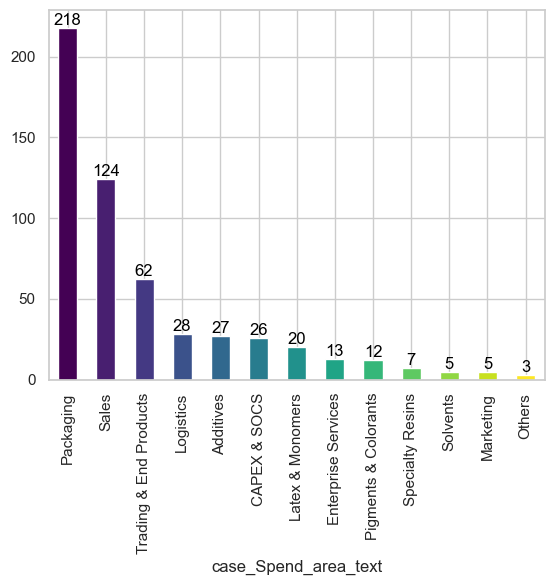

In [45]:

visualize_column(dataframe, 'case_Spend_area_text')

In [46]:
#show first and last events in the whole event_log using pm4py
first_event = pm4py.get_start_activities(event_log)
last_event = pm4py.get_end_activities(event_log)

print(first_event)
print(last_event)

{'SRM: Created': 1, 'Vendor creates invoice': 12, 'Create Purchase Order Item': 42, 'Delete Purchase Order Item': 2, 'Record Invoice Receipt': 10, 'Create Purchase Requisition Item': 13, 'Remove Payment Block': 3, 'Vendor creates debit memo': 1, 'Clear Invoice': 5, 'Record Goods Receipt': 11}
{'Clear Invoice': 44, 'Create Purchase Order Item': 11, 'Vendor creates invoice': 7, 'Record Invoice Receipt': 13, 'Change Quantity': 2, 'Remove Payment Block': 5, 'Record Goods Receipt': 12, 'Delete Purchase Order Item': 4, 'Cancel Goods Receipt': 1, 'Receive Order Confirmation': 1}


In [47]:
k = 2
filtered_log = pm4py.filter_variants_top_k(event_log, k)
print(filtered_log[0])

{'attributes': {'concept:name': '4507001069_00390'}, 'events': [{'eventID': 11458972745728, 'case_Spend_area_text': 'Packaging', 'case_Company': 'companyID_0000', 'case_Document_Type': 'Standard PO', 'case_Sub_spend_area_text': 'Labels', 'case_Purchasing_Document': 4507001069, 'case_Purch._Doc._Category_name': 'Purchase order', 'case_Vendor': 'vendorID_0182', 'case_Item_Type': 'Standard', 'case_Item_Category': '3-way match, invoice before GR', 'case_Spend_classification_text': 'PR', 'case_Source': 'sourceSystemID_0000', 'case_Name': 'vendor_0180', 'case_GR-Based_Inv._Verif.': False, 'case_Item': 390, 'case_concept_name': '4507001069_00390', 'case_Goods_Receipt': True, 'event_User': 'NONE', 'event_org_resource': 'NONE', 'event_concept_name': 'Vendor creates invoice', 'event_Cumulative_net_worth_(EUR)': 369.0, 'event_time_timestamp': Timestamp('2018-01-15 23:59:00+0000', tz='UTC'), '@@index': 13, '@@case_index': 1, 'concept:name': 'Vendor creates invoice', 'time:timestamp': Timestamp('20

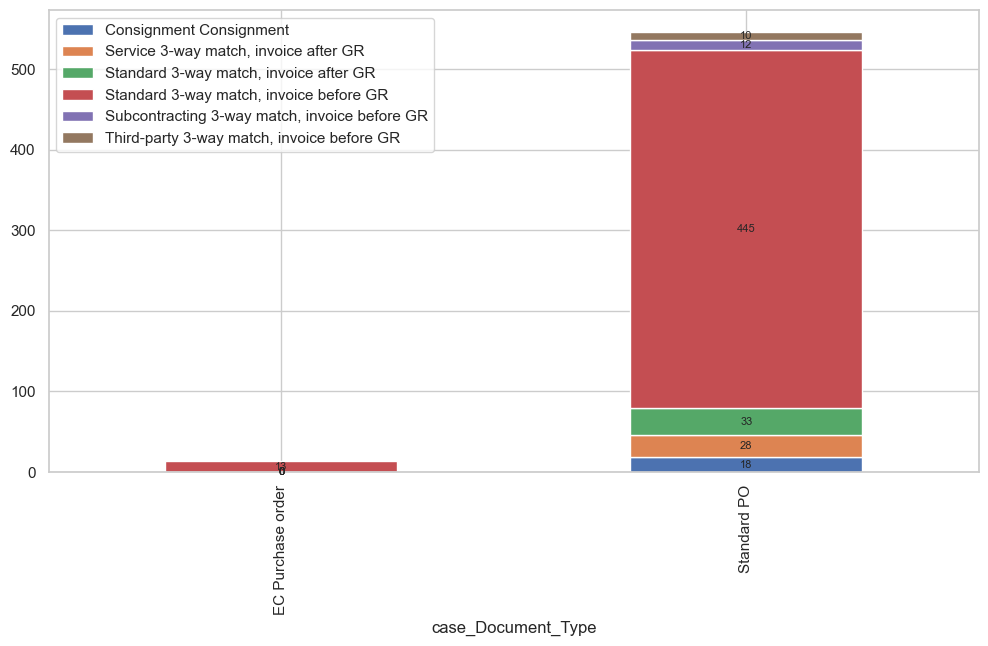

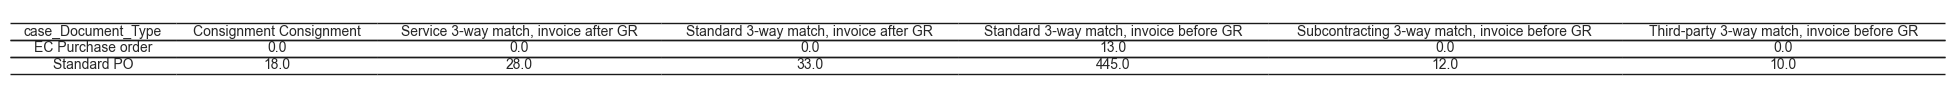

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

def create_stacked_bar_and_table(df, index_col, col1, col2):
    """
    Creates a stacked bar chart and a separate table plot.

    Parameters:
    - df: DataFrame containing the data.
    - index_col: The name of the column to be used as the index for grouping.
    - col1: The name of the first column to be used for creating subgroups.
    - col2: The name of the second column to be used for creating subgroups.
    """
    
    # Group and pivot the data
    grouped = df.groupby([index_col, col1, col2]).size().reset_index(name='count')
    pivot_df = grouped.pivot_table(index=index_col, 
                                   columns=[col1, col2], 
                                   values='count', 
                                   fill_value=0)

    # Flatten the MultiIndex columns for plotting
    pivot_df.columns = [' '.join(col).strip() for col in pivot_df.columns.values]

    # Plot the stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    pivot_df.plot(kind='bar', stacked=True, ax=ax)

    # Annotate bars with values
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=8)

    plt.show()

    # Create the table plot
    fig, ax = plt.subplots(figsize=(12, 0.5 * len(pivot_df)))
    ax.axis('tight')
    ax.axis('off')
    table_data = pivot_df.reset_index().values
    colLabels = pivot_df.reset_index().columns.tolist()
    table_ax = ax.table(cellText=table_data, colLabels=colLabels, loc='center', cellLoc='center', edges='horizontal')
    table_ax.auto_set_font_size(False)
    table_ax.set_fontsize(10)
    table_ax.auto_set_column_width(col=list(range(len(colLabels)))) # Provide automatic width to columns
    plt.show()

create_stacked_bar_and_table(dataframe,  'case_Document_Type', 'case_Item_Type','case_Item_Category')
